# Polymer Properties Model Refinement
Data and methodology taken from: Estimation and Prediction of the Polymers’ Physical Characteristics Using the Machine Learning Models Polymers 2024, 16(1), 115; https://doi.org/10.3390/polym16010115.

Github repository: https://github.com/catauggie/polymersML/tree/main

The goal of this notebook is to begin the refine the model of linear regression using different ML techniques

In [1]:
# Go ahead and import the data into a dataframe and then make sure its imported properly by listing the first few lines
import pandas as pd
new_df = pd.read_excel('Tg_Data_Frame.xlsx')
new_df.head(3)

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023,Glass transition temperature_value_median
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60.00
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.39
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-24.05


# Tuning the model

## Function Definitions

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



def evaluate_model_performance(y_test, y_pred):
    """
    Evaluate the performance of a model using various metrics.
    
    Parameters:
    - y_test: array-like of shape (n_samples,) or (n_samples, n_outputs), 
              True values for X.
    - y_pred: array-like of shape (n_samples,) or (n_samples, n_outputs),
              Estimated target values.
    """
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    variance_score = explained_variance_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.3f}')
    print(f'R-squared: {r2:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')
    print(f'Explained Variance Score: {variance_score:.3f}')
    print(f'Median Absolute Error: {medae:.3f}')

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# evaluate_model_performance(y_test, y_pred)


def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot the actual vs. predicted values to evaluate a model's performance.
    
    Parameters:
    - y_test: array-like, True values.
    - y_pred: array-like, Predicted values.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability

    # Scatter plot for actual vs. predicted values
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')

    # Ideal line for perfect predictions
    max_val = max(max(y_test), max(y_pred))  # Find the maximum value for setting plot limits
    min_val = min(min(y_test), min(y_pred))  # Find the minimum value for setting plot limits
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

    # Customization and labels
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Model Predictions vs. Actual Data')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# plot_actual_vs_predicted(y_test, y_pred)

def bland_altman_plot(y_test, y_pred):
    """
    Generate a Bland-Altman plot to assess the agreement between two sets of measurements.
    
    Parameters:
    - y_test: array-like, true values.
    - y_pred: array-like, predicted values.
    """
    avg = (y_test + y_pred) / 2
    diff = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(avg, diff, alpha=0.5)
    plt.axhline(y=np.mean(diff), color='r', linestyle='--', label='Mean Difference')
    plt.axhline(y=np.mean(diff) + 1.96 * np.std(diff), color='g', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(y=np.mean(diff) - 1.96 * np.std(diff), color='g', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Average of Actual and Predicted Values')
    plt.ylabel('Difference Between Actual and Predicted Values')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.show()

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# bland_altman_plot(y_test, y_pred)


Random Forest Regressor

Mean Squared Error: 2115.649
R-squared: 0.828
Mean Absolute Error: 32.259
Explained Variance Score: 0.828
Median Absolute Error: 23.070


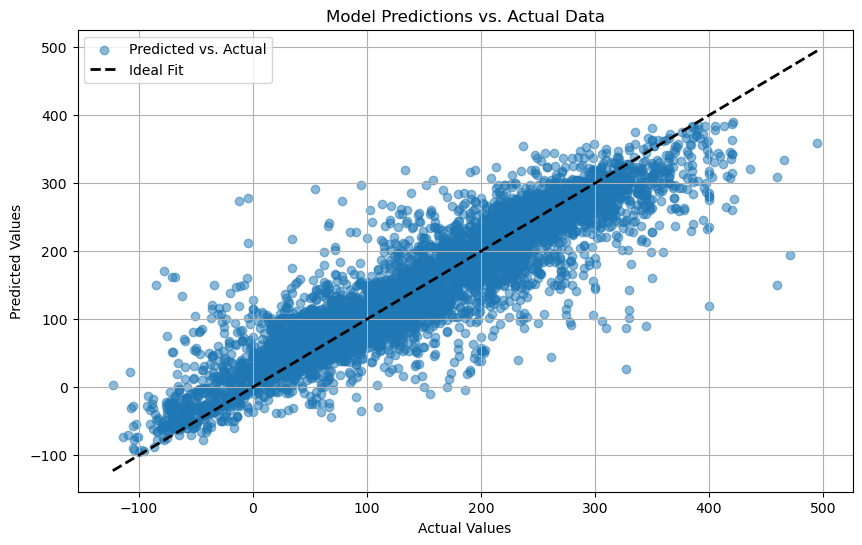

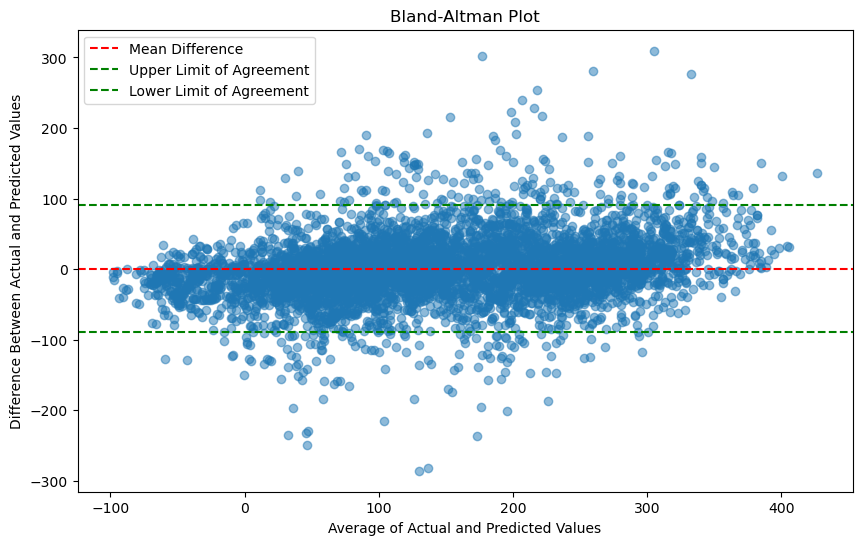

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
# Assuming 'df' is your DataFrame
cols = [c for c in new_df.columns if 'col' in c]
X = new_df[cols]
y = new_df['Glass transition temperature_value_median']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
bland_altman_plot(y_test, y_pred)